## Insert Packages

In [1]:
#handling
import csv
import numpy as np
from numpy import genfromtxt
import pandas as pd
from time import time

#Models
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

#Scores
from sklearn.metrics import f1_score, accuracy_score, log_loss

#FS  !pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#Graphs
import seaborn as sns
import matplotlib.pyplot as plt

## Insert Data Extracted on previous process

In [2]:
#Training Data
training_set = genfromtxt('training_features_scaled.csv', delimiter=',') #,skip_header=1
labels = genfromtxt('labels.csv', delimiter=',') #labels

In [3]:
#Testing Data
testing_set = genfromtxt('testing_features_scaled.csv', delimiter=',')

In [4]:
#Solutions to compare
with open("solutions.csv", "r") as s:
    reader = csv.reader(s)    
    solutions  = list(reader)
sol = [element[1] for element in solutions] 
sol = sol [1:len(sol)] 
for i in range(0, len(sol)):
    sol[i] = int(sol[i])

## Pearson correlation coefficient

Define the Pearson correlation coefficient between certain variables to see if the result of feature selection make sense ( certain features are being eliminated due to their correlation with the chosen ones).

In [5]:
df=pd.DataFrame(training_set,columns=['overlap_title','temp_diff','comm_auth', 'overlap_journ','overlap_abstr','cos_sim_abstr', 'cos_sim_title', 'cos_sim_author', 'cos_sim_journal','jac_sim', 'pref_attac', 'adam_index','com_neigh', 'same_cluster','commun_ra'])

In [6]:
print('The correlation between overlap_journ and cos_sim_journal is :',(df['overlap_journ']).corr(df['cos_sim_journal']))
print('\nThe correlation between cos_sim_abstr and overlap_abstr is :',(df['cos_sim_abstr']).corr(df['overlap_abstr']))
print('\nThe correlation between cos_sim_author and comm_auth is :',(df['cos_sim_author']).corr(df['comm_auth']))
print('\nThe correlation between adam_index and jac_sim is :',(df['adam_index']).corr(df['jac_sim']))
print('\nThe correlation between adam_index and com_neigh is :',(df['adam_index']).corr(df['com_neigh']))

The correlation between overlap_journ and cos_sim_journal is : 0.6961093120203985

The correlation between cos_sim_abstr and overlap_abstr is : 0.657352002806121

The correlation between cos_sim_author and comm_auth is : 0.6591472522652183

The correlation between adam_index and jac_sim is : 0.5917660360358773

The correlation between adam_index and com_neigh is : 0.9916100524582747


We expect one feature of each pair to be excluded. If the whole pair is excluded then that happens due to poor performance.

## Feature Selection

In [7]:
# train data into a dataframe
df=pd.DataFrame(training_set,columns=['overlap_title','temp_diff','comm_auth', 'overlap_journ','overlap_abstr','cos_sim_abstr', 'cos_sim_title', 'cos_sim_author', 'cos_sim_journal','jac_sim', 'pref_attac', 'adam_index','com_neigh', 'same_cluster','commun_ra'])

In [8]:
def fs(number_f,kind):
    if kind==True:
                
    #Sequential Forward Selection 
        SFS = sfs(svm.LinearSVC(),
                  k_features=number_f,  # Number of features to be selected
                  forward=True,   
                  floating=False,      # Do not exclude features from the previous iteration
                  scoring='f1',
                  cv = None)             # None, to use the default 5-fold cross validation

        # Place all the feature names into a list
        feature_names=['overlap_title','temp_diff','comm_auth', 'overlap_journ','overlap_abstr','cos_sim_abstr', 'cos_sim_title', 'cos_sim_author', 'cos_sim_journal','jac_sim', 'pref_attac', 'adam_index','com_neigh', 'same_cluster','commun_ra']    
        # Apply the fit
        SFS.fit(training_set, labels,custom_feature_names=feature_names) 
        
        
        #Plot results
        fig = plot_sfs(SFS.get_metric_dict(), kind='std_err')  # standard errors of the cross-validation scores
        plt.ylim([0.8, 1])
        plt.title('Sequential Forward Selection (with standard errors)')
        plt.grid()
        plt.show()
        
    else:
        
        #Sequential Backward Selection 
        SFS = sfs(svm.LinearSVC(),
                  k_features=number_f,    # Number of features to be selected
                  forward=False,   
                  floating=False,        # Do not include features from the previous iteration
                  scoring='f1',
                  cv = None)   # None, to use the default 5-fold cross validation,

        # Place all the feature names into a list
        feature_names=['overlap_title','temp_diff','comm_auth', 'overlap_journ','overlap_abstr','cos_sim_abstr', 'cos_sim_title', 'cos_sim_author', 'cos_sim_journal','jac_sim', 'pref_attac', 'adam_index','com_neigh', 'same_cluster','commun_ra']    
        # Apply the fit
        SFS.fit(training_set, labels,custom_feature_names=feature_names) 

        
        #Plot results
        fig = plot_sfs(SFS.get_metric_dict(), kind='std_err')  # standard errors of the cross-validation scores
        plt.ylim([0.8, 1])
        plt.title('Sequential Backward Selection (with standard errors)')
        plt.grid()
        plt.show()

        
    #Create a dataframe for the SFS results 
    df_SFS_results = pd.DataFrame(SFS.subsets_).transpose()
    print('\n',df_SFS_results)
    

    print('\nIndex of features : ',SFS.k_feature_idx_)  #index of feature selected features      
    print('\n',SFS.k_score_)             # CV Score

    return(SFS.k_feature_names_)     #name of features selected  

In this phase forward and backward feature selection were executed (with the sampling dataset) and the results pointed that the optimal number of features were 6. Due to run time, the whole dataset is going to be tested on backward feature selection for 6 features.

In [9]:
#%%time
#fs(1,False)  # Backward Feature Selection

In [10]:
# %%time
# fs(15,True)  # Forward Feature Selection

Optimal number of features is 6. Run backward feature selection to view them. 

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

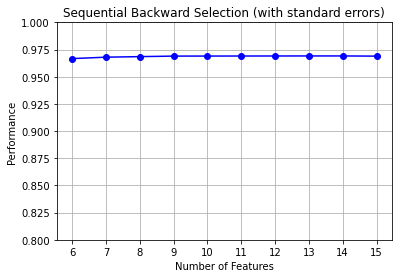


                                           feature_idx             cv_scores  \
15  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  [0.9689402935952911]   
14    (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14)  [0.9691098308695342]   
13       (0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14)  [0.9691070775607927]   
12          (0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14)  [0.9690728532087123]   
11             (0, 1, 3, 5, 6, 7, 10, 11, 12, 13, 14)  [0.9690410322792119]   
10                (0, 1, 5, 6, 7, 10, 11, 12, 13, 14)  [0.9690034828399942]   
9                    (1, 5, 6, 7, 10, 11, 12, 13, 14)  [0.9689672704644967]   
8                        (1, 5, 6, 7, 11, 12, 13, 14)  [0.9684770489462476]   
7                           (1, 5, 7, 11, 12, 13, 14)  [0.9679777918579262]   
6                              (1, 5, 11, 12, 13, 14)  [0.9666643864249611]   

   avg_score                                      feature_names  
15   0.96894  (overlap_title, temp_diff, comm_auth, overlap_..

In [11]:
%%time
feature_names=fs(6,False)

In [12]:
feature_names

('temp_diff',
 'cos_sim_abstr',
 'adam_index',
 'com_neigh',
 'same_cluster',
 'commun_ra')

<b> End up in 6 Features: </b>

1) Temporal distance between the papers  
2) Cosine similarity of adbstract    
3) Adamic Adar Index   
4) Common neighbours    
5) Same Cluster (community)   
6) Community resource allocation    

In [13]:
# New train set with 6 optimal features
train_fs=np.array([df['temp_diff'],df['cos_sim_abstr'],df['adam_index'],df['com_neigh'],df['same_cluster'],df['commun_ra']]).T

In [14]:
# Save the new train csv

with open("fs_training_features.csv","w") as fs_feat:
    csv_out = csv.writer(fs_feat)    
    for row in train_fs:
        csv_out.writerow(row)

In [15]:
df=pd.DataFrame(testing_set,columns=['overlap_title','temp_diff','comm_auth', 'overlap_journ','overlap_abstr','cos_sim_abstr', 'cos_sim_title', 'cos_sim_author', 'cos_sim_journal','jac_sim', 'pref_attac', 'adam_index','com_neigh', 'same_cluster','commun_ra'])
# New test set with 6 optimal features
test_fs=np.array([df['temp_diff'],df['cos_sim_abstr'],df['adam_index'],df['com_neigh'],df['same_cluster'],df['commun_ra']]).T

In [16]:
# Save the new test csv

with open("fs_testing_features.csv","w") as fs_feat:
    csv_out = csv.writer(fs_feat)    
    for row in test_fs:
        csv_out.writerow(row)

<b> Open new train and test set </b>

In [17]:
#Training Data
training_set = genfromtxt('fs_training_features.csv', delimiter=',')

In [18]:
#Testing Data
testing_set = genfromtxt('fs_testing_features.csv', delimiter=',')

# Algorithms  

- SVM  
- KNN  
- Decision Trees  
- Radom Forest Classifier  
- AdaBoost
- Bagging Classifier
- Gradient Boosting Classifier
- Gausian NB
- Linear Discriminant Analysis
- MLP Classifier


From the above algorithms, 4 were excluded due to poor performance (comparing with the others).
This decision was made on the sampling datasets so as to decrease the run time when the whole dataset was going to be used. The excluded algorithms are LinearDiscriminantAnalysis, DecisionTreeClassifier, GaussianNB and BaggingClassifier.

In [19]:
#name the models
l_models =["SVM", "KNN", "RFC", "ADAB", "GBC", "MLP"] # "DT", "BC", "GNB", "LDA"

In [20]:
#Create a function to train each model
def TrainTestClassifier(C):
    
    if C == "SVM":
        classifier = svm.LinearSVC() #Create an SVM model
    elif C == "KNN":
        classifier = KNeighborsClassifier(3) #Create an KNN model
#     elif C == "DT":
#         classifier = DecisionTreeClassifier() #Create a Decision Tree Classifier    
    elif C == "RFC":
        classifier = RandomForestClassifier() #Create a Random Forest

    elif C == "ADAB":
        classifier = AdaBoostClassifier() #Create a Bagging Classifier
#     elif C == "BC":
#         classifier = BaggingClassifier() #Create a Bagging Classifier
    elif C == "GBC":
        classifier = GradientBoostingClassifier() #Create a Gradient Boosting Classifier
#     elif C == "GNB":
#         classifier = GaussianNB() #Create a GaussianNB
#     elif C == "LDA":
#         classifier = LinearDiscriminantAnalysis() #Create a Linear Discriminant Analysis   
    elif C == "MLP":
        classifier = MLPClassifier()  #Create a MLPC lassifier
   


    classifier.fit(training_set, labels) #Train the model selected
    predictions = classifier.predict(testing_set) # Perform predictions
    
    # Scores
    f1_sc = f1_score(y_true = sol, y_pred = predictions) # Compare prediction with actula values
    accuracy = accuracy_score(y_true = sol, y_pred = predictions)
    logloss = log_loss(y_true = sol, y_pred = predictions)

    return [C, f1_sc, accuracy, logloss]  


In [21]:
%%time
RESULTS = []
for model in l_models:
    RESULTS.append(TrainTestClassifier(model))

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Wall time: 7min 29s


In [22]:
df_results = pd.DataFrame(RESULTS, columns=["Classifier", 'F1 Score', 'Accuracy', 'LogLos'])
display(df_results)


,Classifier,F1 Score,Accuracy,LogLos
0,SVM,0.962613,0.960518,1.363657
1,KNN,0.969790,0.967563,1.120341
2,RFC,0.964262,0.961376,1.334045
3,ADAB,0.960477,0.958589,1.430303
4,GBC,0.973861,0.972066,0.964824
5,MLP,0.974011,0.972066,0.964826


# Graphs

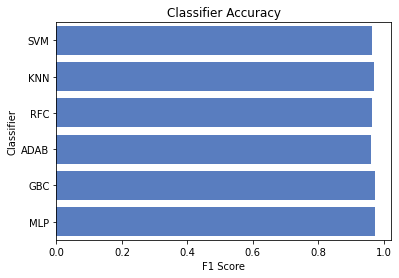

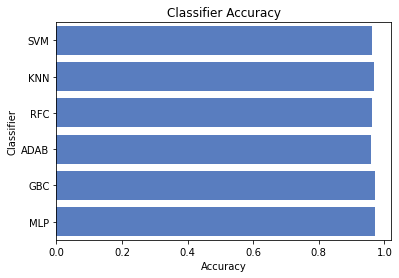

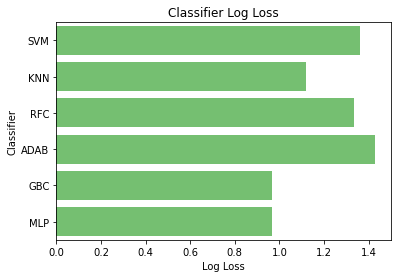

In [23]:
sns.set_color_codes("muted")

sns.barplot(x='F1 Score', y='Classifier', data=df_results, color="b")

plt.xlabel('F1 Score')
plt.title('Classifier Accuracy')
plt.show()

sns.barplot(x='Accuracy', y='Classifier', data=df_results, color="b")

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='LogLos', y='Classifier', data=df_results, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

<b> Try different parameters on classifiers </b>

The base_estimator of the AdaBoostClassifier was experimented with Support Vector Classifier and a Voting Classifier (with Decision Tree and Support Vector) on sampling. The results were worse and the execution time was highly increased. So this method is just being stated and will not be included here.

In [24]:
# from sklearn.svm import SVC
# svc=SVC(probability=True, kernel='linear')
# classifier = AdaBoostClassifier(base_estimator=svc)

In [25]:
# from sklearn.ensemble import VotingClassifier
# votingClf = VotingClassifier([('clf1',SVC(probability=True)),('clf2',DecisionTreeClassifier())],voting='soft')
# classifier = AdaBoostClassifier(base_estimator=votingClf)

In [26]:
#name the models
l_models =["RFC", "ADAB",  "GBC",  "MLP"]

#Create a function to train each model
def ImprovedClassifiers(C):
    
    if C == "RFC":
        classifier = RandomForestClassifier(n_jobs=1, n_estimators=700, criterion="entropy", min_samples_split=10,
                                            min_samples_leaf=2, max_features="sqrt", max_depth=10) 
    elif C == "ADAB":
        classifier = AdaBoostClassifier(n_estimators=5,  random_state=42,
                                        base_estimator=RandomForestClassifier(max_depth=6, random_state=42)) 
    elif C == "GBC":
        classifier = GradientBoostingClassifier(loss='exponential',min_samples_split=50,max_depth=5) 
    elif C == "MLP":
        classifier = MLPClassifier(hidden_layer_sizes=(250,100,50), max_iter=100,activation = 'relu',solver='adam',
                                   random_state=1)   


    classifier.fit(training_set, labels) #Train the model selected
    predictions = classifier.predict(testing_set) # Perform predictions
    
    # Scores
    f1_sc = f1_score(y_true = sol, y_pred = predictions) # Compare prediction with actula values
    accuracy = accuracy_score(y_true = sol, y_pred = predictions)
    logloss = log_loss(y_true = sol, y_pred = predictions)

    return [C, f1_sc, accuracy, logloss]  

In [27]:
%%time
RESULTS = []
for model in l_models:
    RESULTS.append(ImprovedClassifiers(model))
df_results = pd.DataFrame(RESULTS, columns=["Classifier", 'F1 Score', 'Accuracy', 'LogLos'])
display(df_results)    

,Classifier,F1 Score,Accuracy,LogLos
0,RFC,0.974645,0.972831,0.938377
1,ADAB,0.974670,0.972862,0.937319
2,GBC,0.973412,0.971637,0.979634
3,MLP,0.974406,0.972586,0.946840


Wall time: 31min 12s


## Graphs

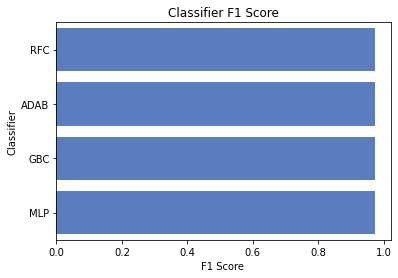

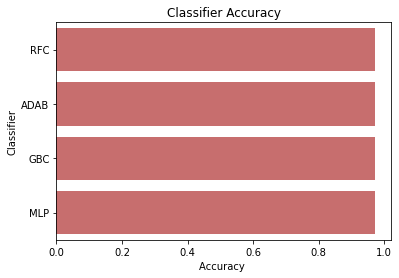

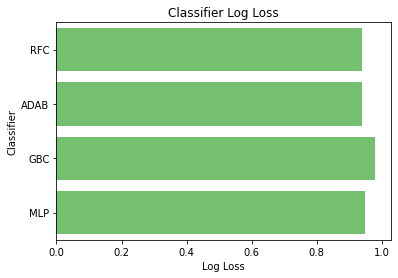

In [28]:
sns.set_color_codes("muted")

sns.barplot(x='F1 Score', y='Classifier', data=df_results, color="b")

plt.xlabel('F1 Score ')
plt.title('Classifier F1 Score')
plt.show()

sns.barplot(x='Accuracy', y='Classifier', data=df_results, color="r")

plt.xlabel('Accuracy ')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='LogLos', y='Classifier', data=df_results, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

<b>Further thoughs</b>

RFC and ADAB have improved results, while GBC and MLP have similar ones. For this phase a lot of parameters were tested so as to conclude to the above results. One could try further experimenting with the parameters for all the classifiers to see if they improve or if they get better results from the ones that we had considered as optimal ones. Also, combining the classifiers or applying a pipeline with grid search, might be something that could give better results. Moreover, including more features in the training phase could be useful, due to the fact that the feature selection may provide with different results. 

While running feature selection with the sampling dataset, the results showed that the optimal number of features were 6. This could happen with the whole dataset so as to see if the optimal number of features are still 6 (due to run time, this couldn't happen here).